In [86]:
#導入需要的依賴包 : 口訣 np sm %%警告
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



# #統計預測圖
seaborn.relplot() 是一個非常好用的繪圖指令, 可以一次把數個變數的關係呈現在一張圖表上.

`load_dataset` looks for online csv files on https://github.com/mwaskom/seaborn-data. Here's the docstring:<br>

Load a dataset from the online repository (requires internet).<br>

>Parameters

>name : str Name of the dataset (name.csv on https://github.com/mwaskom/seaborn-data). You can obtain list of available datasets using func:get_dataset_names<br>
kws : dict, optional Passed to pandas.read_csv


In [87]:
#加載sns內置數據集  sns.load_dataset("檔案名")  →此處不用加副檔名，且只能用他的範例dataset
tips=sns.load_dataset("tips")
sns.set(color_codes=True)
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3



內建數據集-tips數據集 
> 關於數據集，total_bill是消費總金額，tip是小費，size指用餐人數。

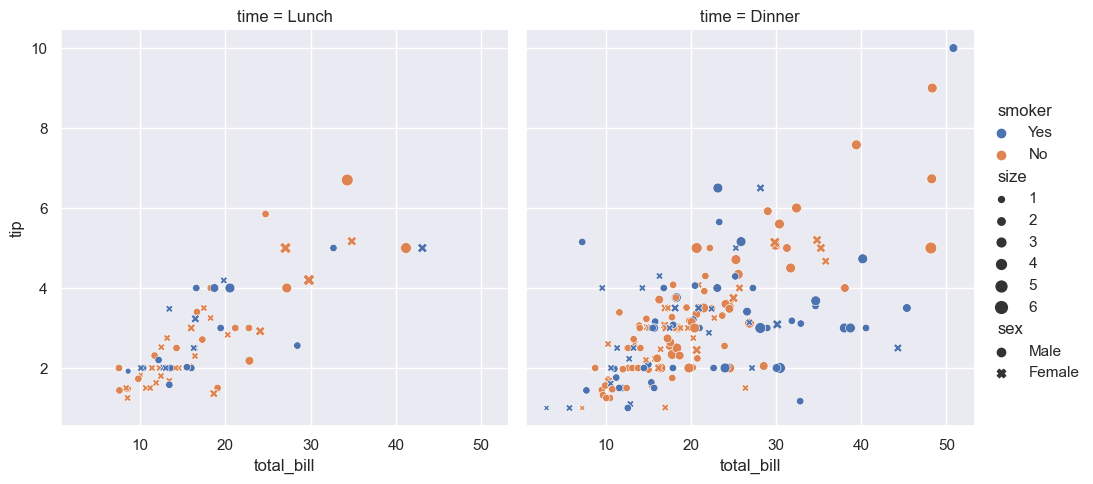

In [88]:
# 用sns.relplot(x, y, col, hue, style, size, data)做出多個變數的統計圖
sns.relplot(x="total_bill",y="tip", col="time", hue="smoker", style="sex", size="size",data=tips)  #  hue=顏色，style=形狀

In [89]:
#  但若使用自己的檔案，會失敗，需先用pandas轉成dataframe：
NBA = sns.load_dataset('data/NBA_season1718_salary.csv')
#  'data/NBA_season1718_salary.csv' is not one of the example datasets.

ValueError: 'data/NBA_season1718_salary.csv' is not one of the example datasets.

# #單變量分析繪圖（直方圖、條形圖）
> Dataset: NBA_season1718_salary.csv<br>
ref:https://www.kaggle.com/koki25ando/salary

In [72]:
#  匯入自己的資料
data=pd.read_csv("data/NBA_season1718_salary.csv")
#對讀進來的數據按薪資降序排序並取前10條數據
salary_top10=data.sort_values("season17_18",ascending=False).head(10)
player=salary_top10["Player"]
season_salary=salary_top10["season17_18"]
salary_top10

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0
5,6,Kyle Lowry,TOR,28703704.0
6,7,Russell Westbrook,OKC,28530608.0
7,8,Mike Conley,MEM,28530608.0
8,9,James Harden,HOU,28299399.0
9,10,DeMar DeRozan,TOR,27739975.0


<Axes: xlabel='Player', ylabel='season17_18'>

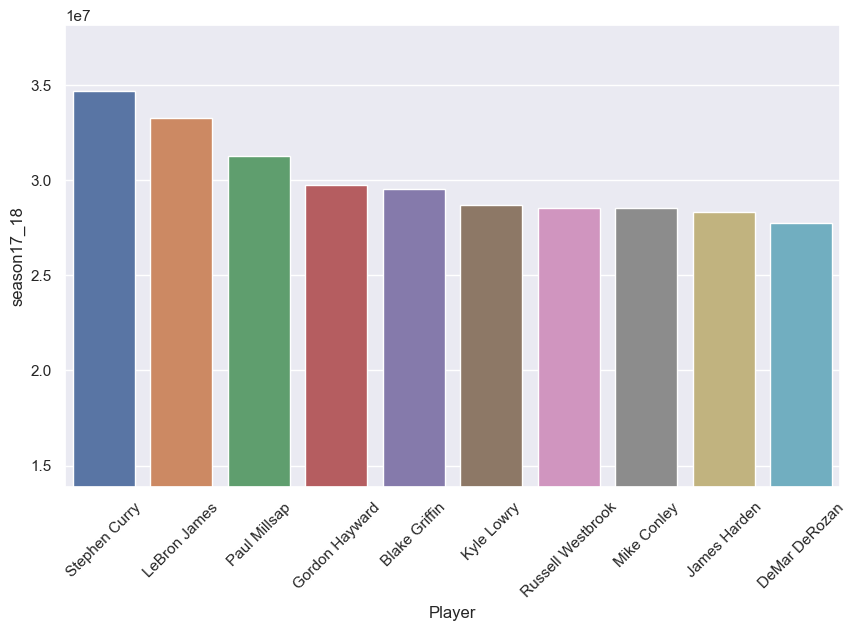

In [30]:
#  單個變數
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)   #  旋轉45度讓名字塞的下
plt.ylim(season_salary.min()*0.5,season_salary.max()*1.1)
sns.barplot(x=player, y=season_salary, data=salary_top10,ci=68)  
#  取出球員列數據，作為條形圖橫坐標
#  取出球員薪資列，作為條形圖縱坐標
#  ci參數表示允許的誤差範圍（控制誤差棒的百分比，在0-100之間）

## Result

從條形圖中不難看出，勇士隊的當家球星curry資最高，將近達到3500萬美元，位居第二的是勒布朗詹姆斯，也是在3300萬美元以上。上面的條形圖是按球員作為橫坐標，下面我們按球隊匯總，看看哪個球隊的薪資總額最高。

# 練習 - 彙總球隊薪資繪製成直方圖
按球隊匯總，看看哪個球隊的薪資總額最高。

<Axes: xlabel='Tm', ylabel='season17_18'>

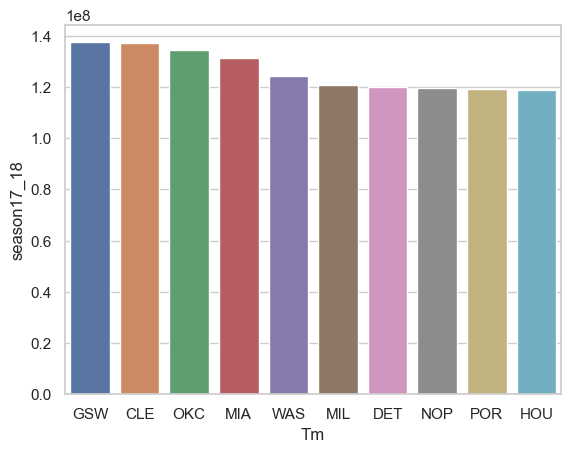

In [84]:
#  依照球隊算總和 .groupby().sum().reset_index()
salary_team=data.groupby("Tm").sum().reset_index()   #要加這個才會有Tm這個標籤!!!!!不然會把Tm這個標籤吃掉
salary_team=salary_team.sort_values("season17_18", ascending=False)
top10=salary_team.head(10)
tm=top10["Tm"]
salary=top10["season17_18"]
sns.color_palette("hls",10)
sns.set(style="whitegrid")
sns.barplot(x=tm,y=salary,data=top10)

# #seaborn線性回歸分析繪圖（regplot）

In [91]:
#導入依賴包 
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
#加載sns內置數據集 

 

內建數據集-tips數據集 
> 關於數據集，total_bill是消費總金額，tip是小費，size指用餐人數。

<Axes: xlabel='total_bill', ylabel='tip'>

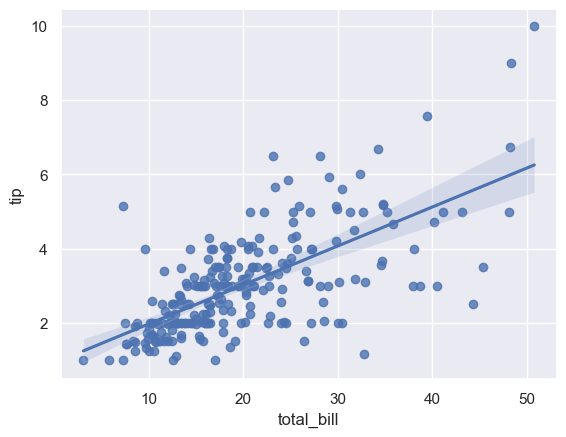

In [95]:
#  線性回歸圖 sns.regplot(x,y)
sns.regplot(data=tips, x="total_bill", y="tip")

# [練習]看看其他變量和小費之間的關係。


<Axes: xlabel='size', ylabel='tip'>

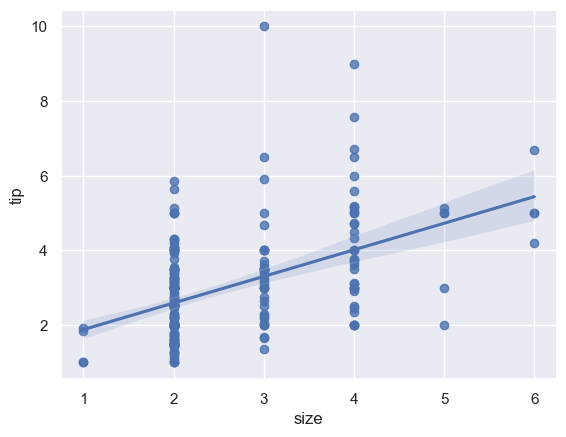

In [96]:
# size和小費的關係
sns.regplot(data=tips, x="size", y="tip")

<Axes: xlabel='size', ylabel='tip'>

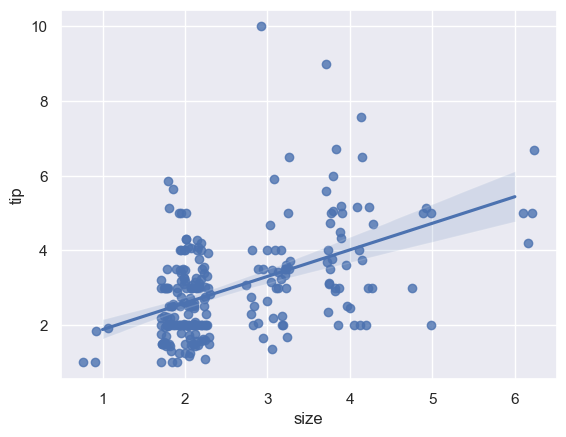

In [97]:
sns.regplot(data=tips, x="size", y="tip", x_jitter=0.3)

In [98]:
#導入依賴包 %matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style="whitegrid", color_codes=True) 
tips = sns.load_dataset("tips")


<Axes: xlabel='tip', ylabel='Density'>

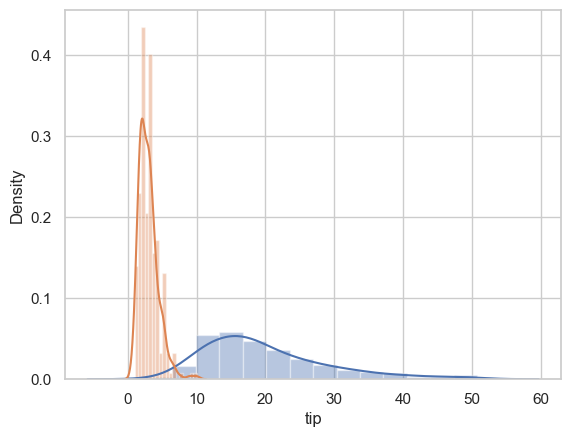

In [100]:
#  兩個直線圖繪在同一個表格   sns.distplot()，但他們是同一個x軸，可以運用在y軸相同的地方，像是台北市各區人數/台南市各區人數
sns.distplot(tips["total_bill"])
sns.distplot(tips["tip"])

# #散點圖（分布散點、分簇散點圖）

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

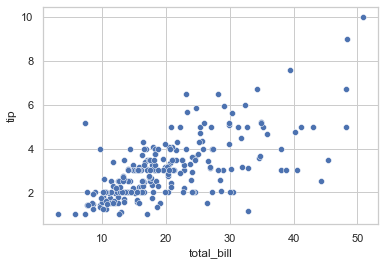

In [22]:
#  散點圖公式
#  sns.scatterplot()
#  sns.stripplot()   分類不同數據的散點圖
#  sns.swarmplot()   分類不同數據的散點圖，且不重疊

<Axes: xlabel='total_bill', ylabel='tip'>

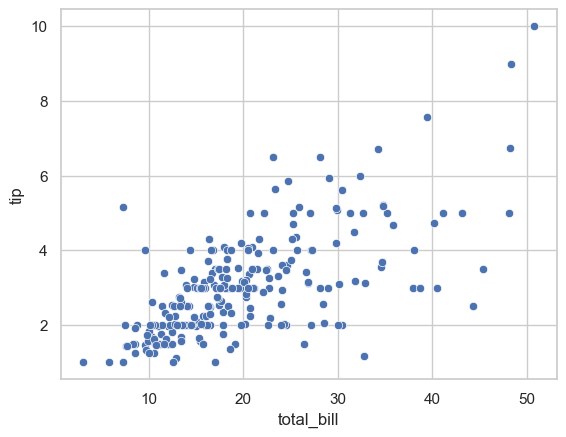

In [102]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

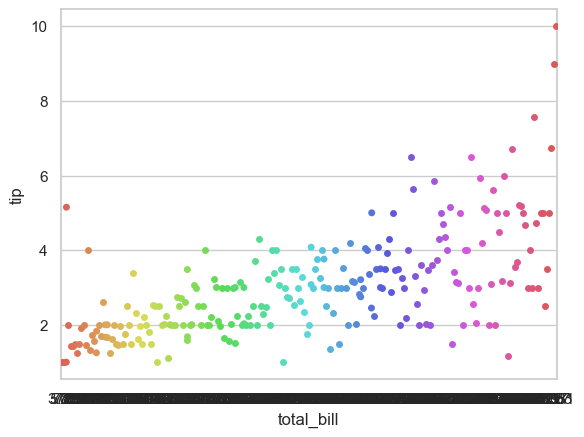

In [109]:
#  totalbill當橫軸，會太多重疊
sns.stripplot(data=tips, x="total_bill", y="tip",palette="hls")

從上面的圖中可以看到，stripplot參數中的x是橫軸數據（分類數據），y是縱軸數據（類型對應數據），由於我們將總金額作為分類，導致分類太多，橫軸數據根本看不清，所以我們重新傳參，分別看下性別和小費、時間和小費，用餐日期跟小費之間的數據分布。

<Axes: xlabel='sex', ylabel='tip'>

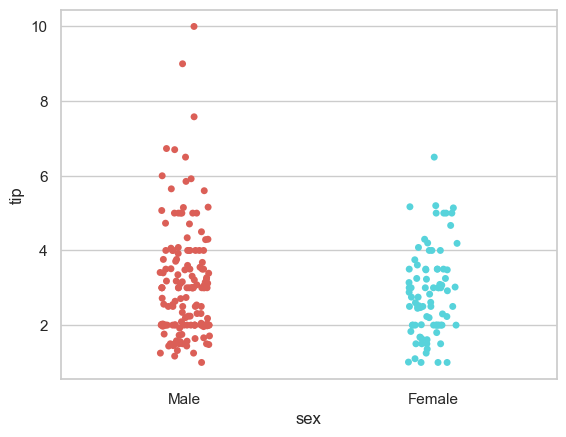

In [112]:
#  性別與小費
sns.stripplot(data=tips, x="sex", y="tip",palette="hls")

<Axes: xlabel='day', ylabel='tip'>

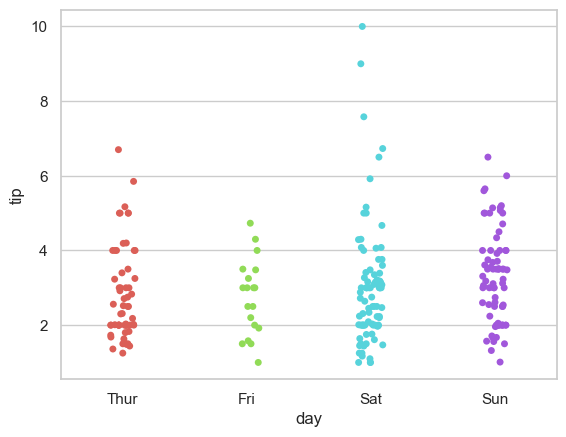

In [113]:
#  禮拜幾與小費
sns.stripplot(data=tips, x="day", y="tip",palette="hls")

<Axes: xlabel='time', ylabel='tip'>

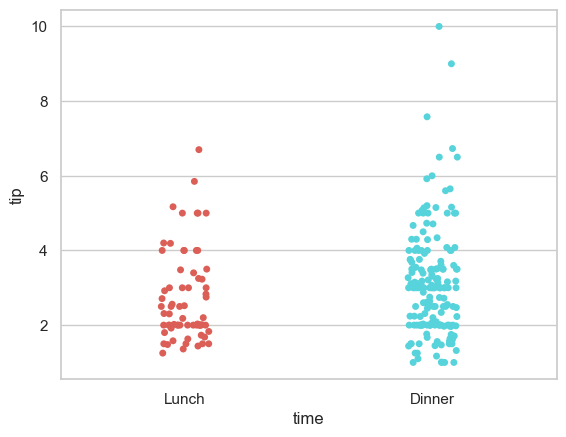

In [114]:
#  時間與小費
sns.stripplot(data=tips, x="time", y="tip",palette="hls")

<Axes: xlabel='smoker', ylabel='tip'>

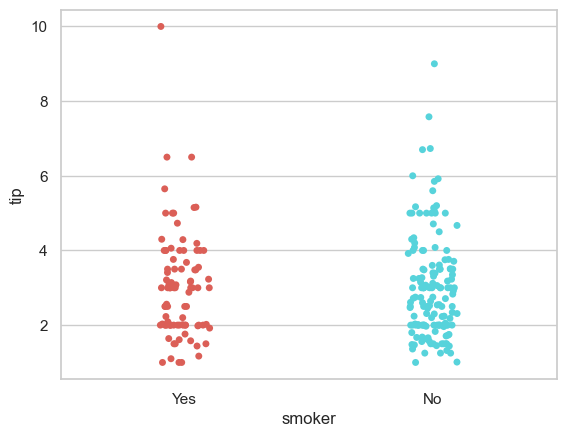

In [115]:
#  抽菸與小費
sns.stripplot(data=tips, x="smoker", y="tip",palette="hls")

因為jitter（數據抖動）這個參數的默認值是True,如果我們將其設置為False，效果如圖：


<Axes: xlabel='smoker', ylabel='tip'>

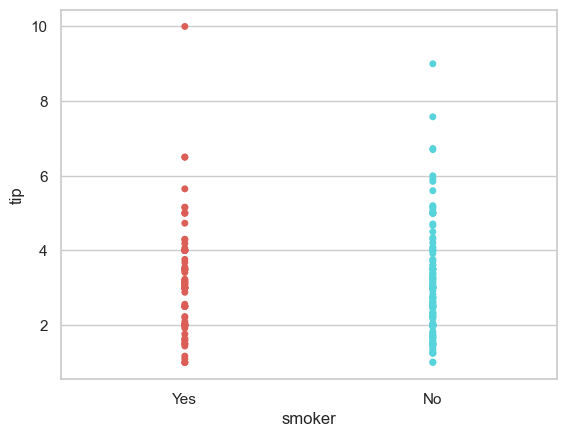

In [117]:
#  jitter數據抖動這個參數設定成False後會變成一條線
sns.stripplot(data=tips, x="smoker", y="tip",palette="hls", jitter=False)

<Axes: xlabel='day', ylabel='tip'>

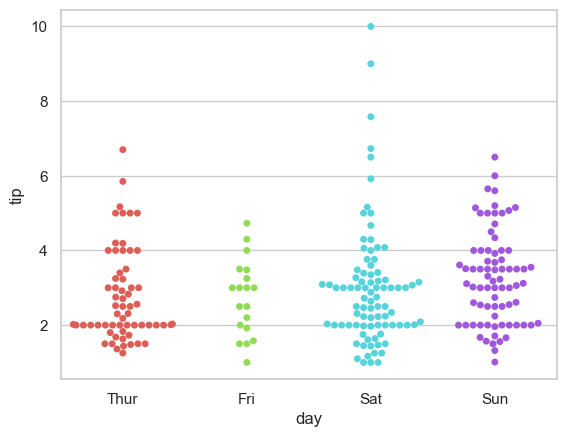

In [118]:
sns.swarmplot(data=tips, x="day", y="tip",palette="hls")

在stripplot函數中，我們只看了某一類別對應的數據，而沒有看類中對應其他類的數據分布，舉個例子，比如我們用stripplot看到男性和女性對應的小費數據，但是不知道男性和女性對應的數據中哪些是吸菸的，哪些是不吸菸的，對於這個問題這兩個函數都有一個hue參數，這裡我們就以分簇散點圖函數為例，演示下這個參數的效果，如圖：


<Axes: xlabel='day', ylabel='tip'>

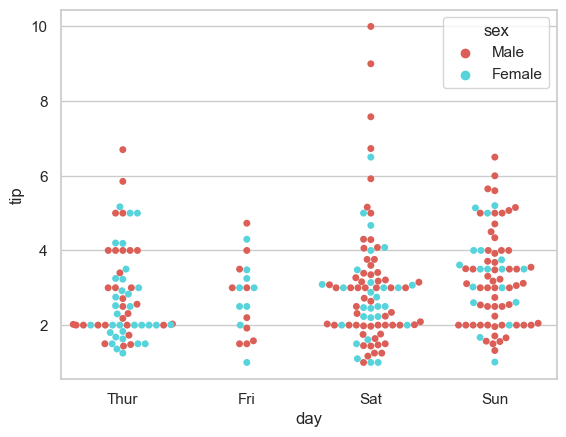

In [119]:
# hue參數，可以看兩個變數，變成三維的概念
sns.swarmplot(data=tips, x="day", y="tip",hue="sex", palette="hls")

上面這個圖就很好的展示了不同性別在不同的星期中付小費數據的分布。

# #繪製盒圖、小提琴圖
seaborn.boxplot()
這個函數主要是繪製出一個箱型圖來反映離群點數據。

<Axes: xlabel='tip'>

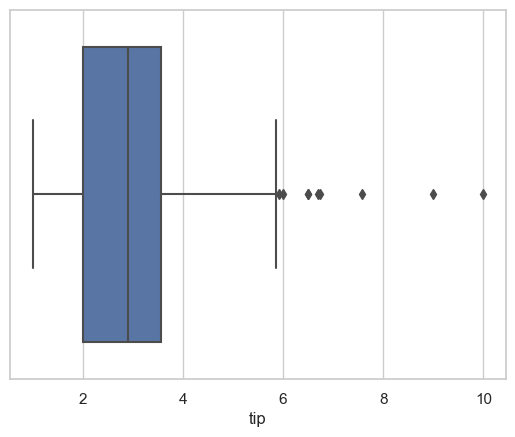

In [131]:
#  也可以是一維的
sns.boxplot(x="tip",data=tips)

<Axes: ylabel='tip'>

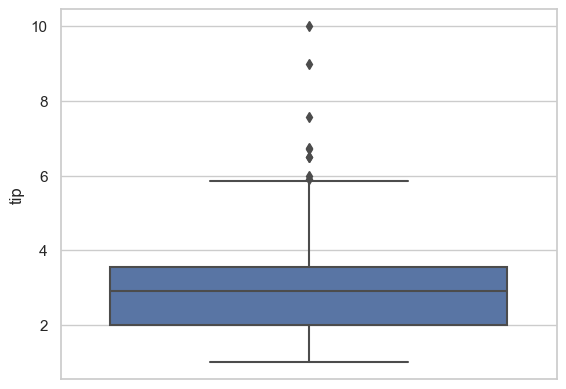

In [132]:
sns.boxplot(y="tip",data=tips)

<Axes: xlabel='day', ylabel='tip'>

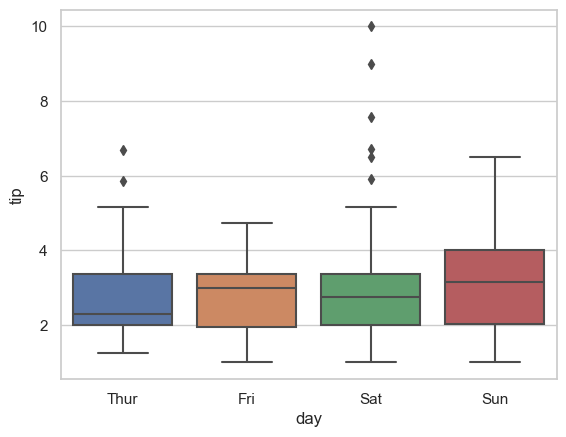

In [120]:
#  觀察離群點數據的sns.boxplot() 或 sns.violinplot()
sns.boxplot(x="day", y="tip",data=tips)

<Axes: xlabel='day', ylabel='tip'>

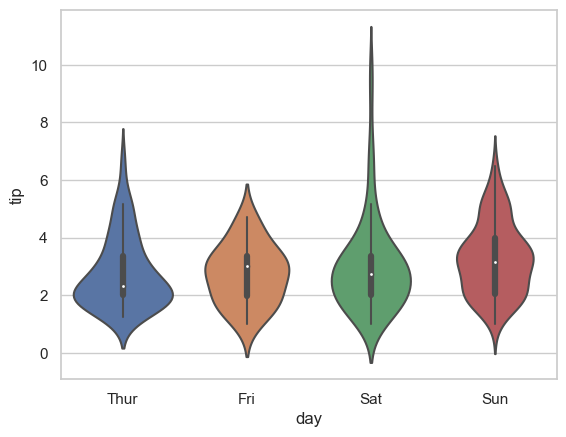

In [122]:
#  小提琴圖可以反映數據密度
sns.violinplot(x="day", y="tip",data=tips)

小提琴圖即反映了數據的離群情況，同時也反映了數據的分布密度。<br>
此函數跟箱型圖一樣，也有hue參數，可以查看第二個分類屬性下的數據分布，如下：


<Axes: xlabel='day', ylabel='tip'>

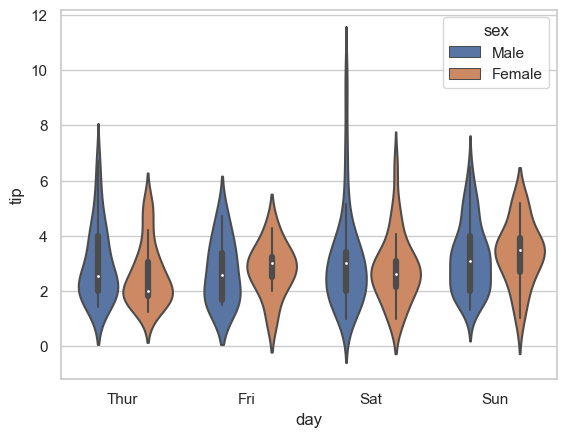

In [127]:
#  若想要同時有三種變數，可以用hue和split
sns.violinplot(x="day", y="tip",hue="sex",data=tips)

可以看到，上面的小提琴圖是4對8個，即當設置hue參數為sex時，每個小提琴的數據集是一類數據，那有沒有辦法讓男性對應數據和女性對應數據都作為一個數據集繪製出一個小提琴圖，只是在一個圖中區分男性數據和女性數據呢？答案是肯定的，violinplot()函數提供了一個split參數，可以做到以上需求，如下：


<Axes: xlabel='day', ylabel='tip'>

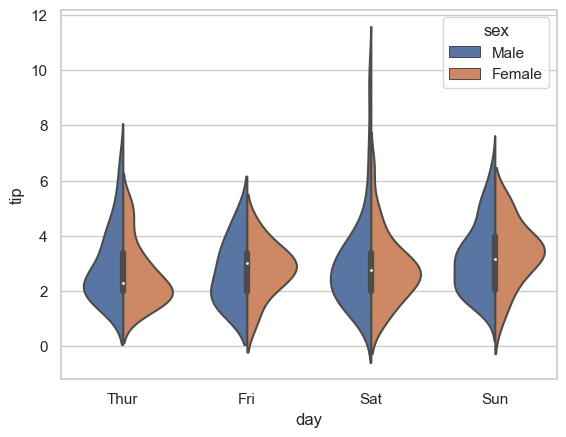

In [128]:
#  split可以把兩個合體，默認是False!!
sns.violinplot(x="day", y="tip",hue="sex",split=True,data=tips)

除此以外，我們再來看一下inner參數，上面的小提琴圖中內部都是箱型圖，通過inner參數，我們可以設置其他類型，inner可選參數有：box、quartile(四分位)、point、stick。我們依次看下：
箱子、四分位切割、點點、線條切割


<Axes: xlabel='day', ylabel='tip'>

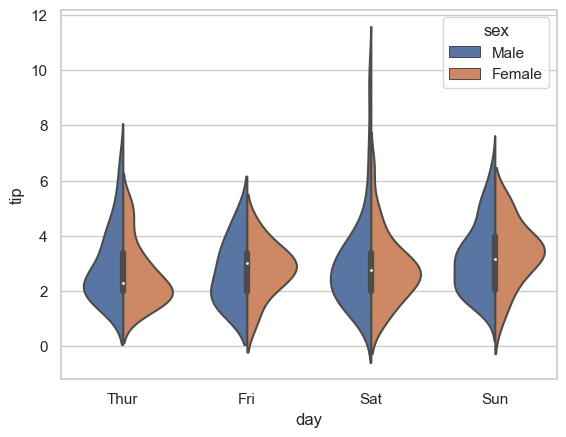

In [143]:
#  inner參數可以用不同分隔
sns.violinplot(x="day", y="tip",hue="sex",split=True,data=tips, inner="box")

<Axes: xlabel='day', ylabel='tip'>

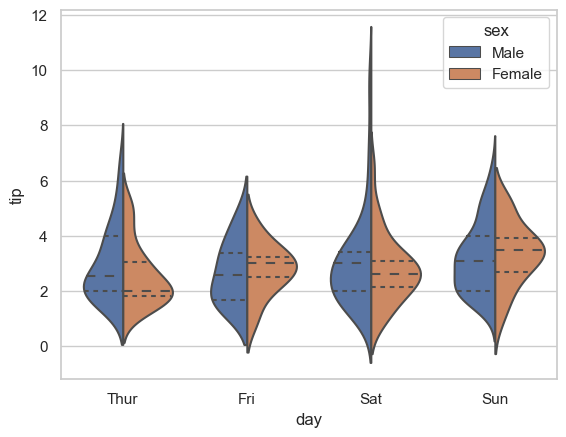

In [144]:
sns.violinplot(x="day", y="tip",hue="sex",split=True,data=tips, inner="quartile")

<Axes: xlabel='day', ylabel='tip'>

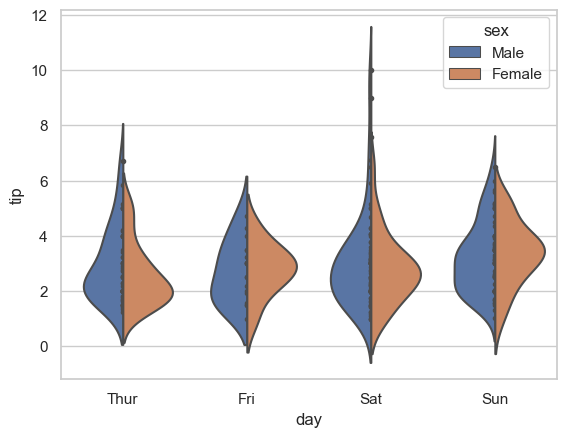

In [145]:
sns.violinplot(x="day", y="tip",hue="sex",split=True,data=tips, inner="point")

<Axes: xlabel='day', ylabel='tip'>

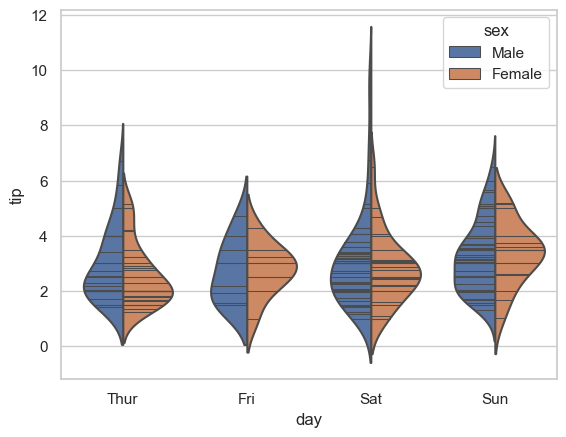

In [146]:
sns.violinplot(x="day", y="tip",hue="sex",split=True,data=tips, inner="stick")

seaborn庫中的很多繪圖方法就是提前給你畫好模板，我們只需要把數據傳進去就得到相應的圖形，
基於此，我門是不是可以在同一個模板上同時繪製分簇圖和箱型圖呢？

<Axes: xlabel='day', ylabel='total_bill'>

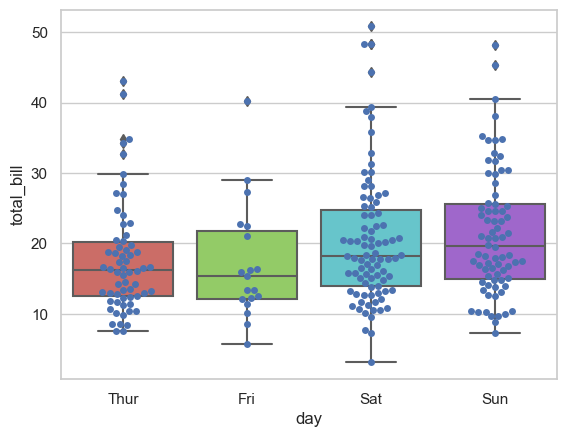

In [140]:
#  可以同時把兩張圖繪製在同一張圖裡面
sns.swarmplot(data=tips, x="day", y="total_bill")
sns.boxplot(data=tips, x="day", y="total_bill", palette="hls")

# #結構化展示多維數據
***Visualizing the multidimensional relationships among the samples is as easy as calling sns.pairplot:***

In [148]:
#  sns.pairplot(資料集, hue="欄位名稱", height=2.5)
#  pairgrid每個都產生不同的兩個變數，但他們倆者之間會有對角線的關係，類似對戰比分表
#  FacetGrid可以產生一系列的數據子集，每個圖差在一個變數，此變數每個不同的值都做出一個圖出來
#  FacetGrid要先用一個dataframe給他


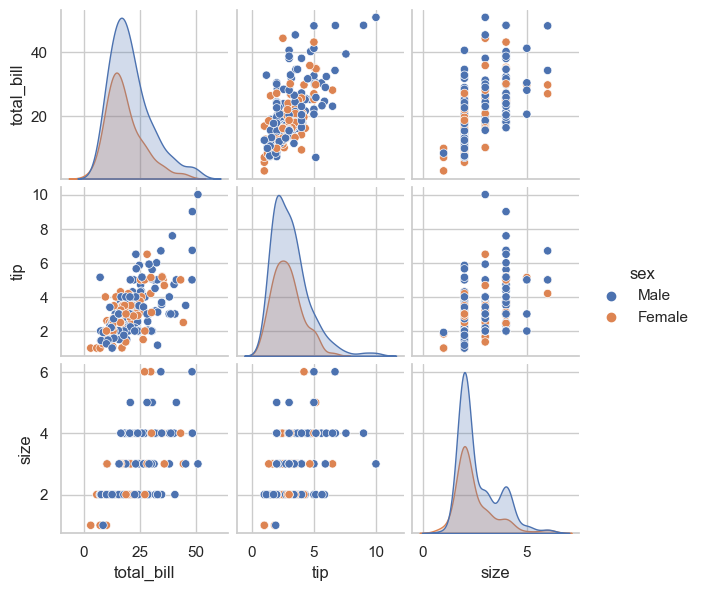

In [150]:
sns.pairplot(tips,hue="sex",height=2)  # 有對角關係!

使用FacetGrid時，我們會通過一個pandas DataFrame以及控制圖形網格的行、列和顏色的變量名稱來初始化一個對象。這些維度變量（控制行、列和顏色的變量）應該是分類變量或者離散變量，然後這些變量的不同水平組合起來就構成了整個圖形的每一個子圖（facet，在這裡可以理解為我們維度拆解的最小粒度）


這一函數的目標是一步到位地提供一幅完整的成品圖，它在完成繪圖後還會對每個坐標軸添加注釋。

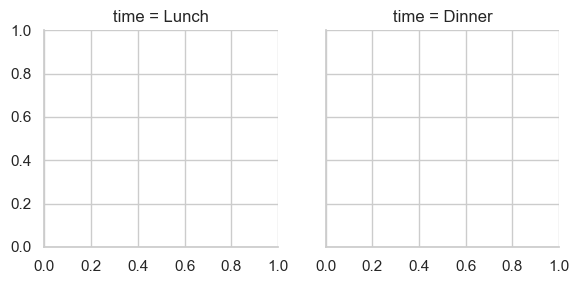

In [153]:
g= sns.FacetGrid(tips,col="time")

In [157]:
g.map(plt.hist,"tip")

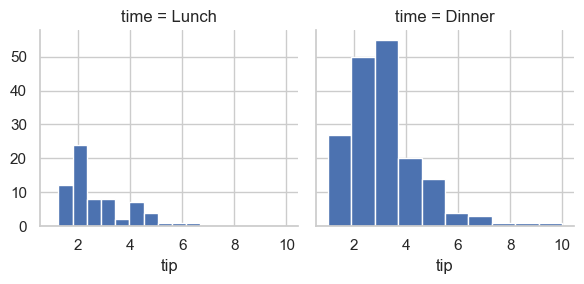

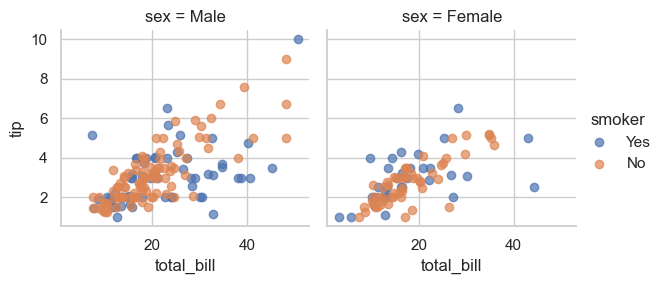

In [156]:
g=sns.FacetGrid(tips,col="sex", hue="smoker")
g.map(plt.scatter,"total_bill","tip",alpha=.7)
g.add_legend()   # 圖例

我們可以指定某個seaborn調色板，也可以通過字典將hue變量中的每個分類與其對應的matplotlib顏色傳遞給函數<br>
（這樣就可以隨心所以使用大量的matplotlib支持的色彩）


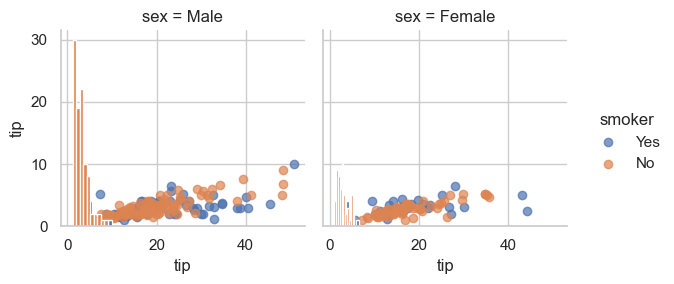

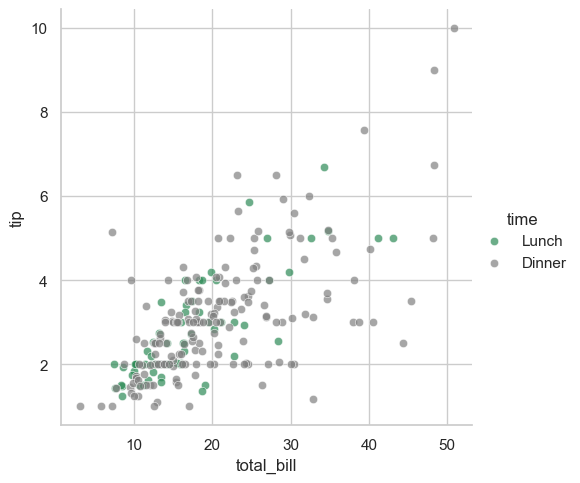

In [158]:
pal=dict(Lunch="seagreen", Dinner="gray")
g=sns.FacetGrid(tips,hue="time",palette=pal,height=5)
g.map(plt.scatter,"total_bill","tip",alpha=.7,linewidth=.5, edgecolor="white")
g.add_legend()   # 圖例


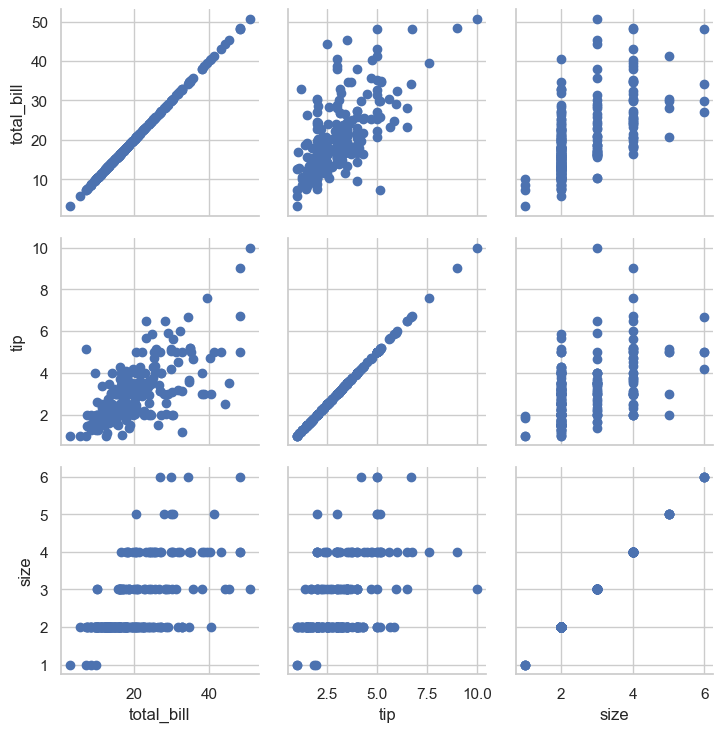

In [159]:
tips=sns.load_dataset("tips")
g=sns.PairGrid(tips)
g.map(plt.scatter)

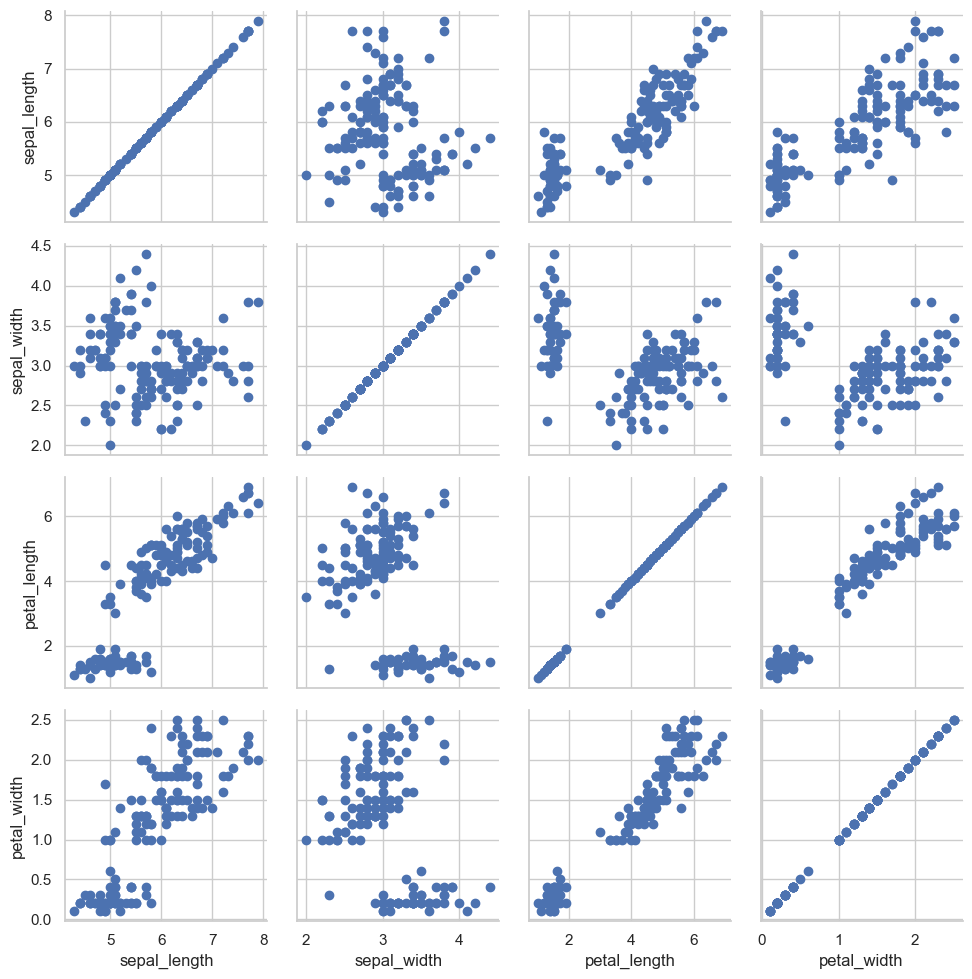

In [162]:
iris=sns.load_dataset("iris")
g=sns.PairGrid(iris)
g.map(plt.scatter)

map_diag()函數是繪製對角線上的單變量子圖，mag_offdiag是繪製對角線以外的兩個變量間的子圖。

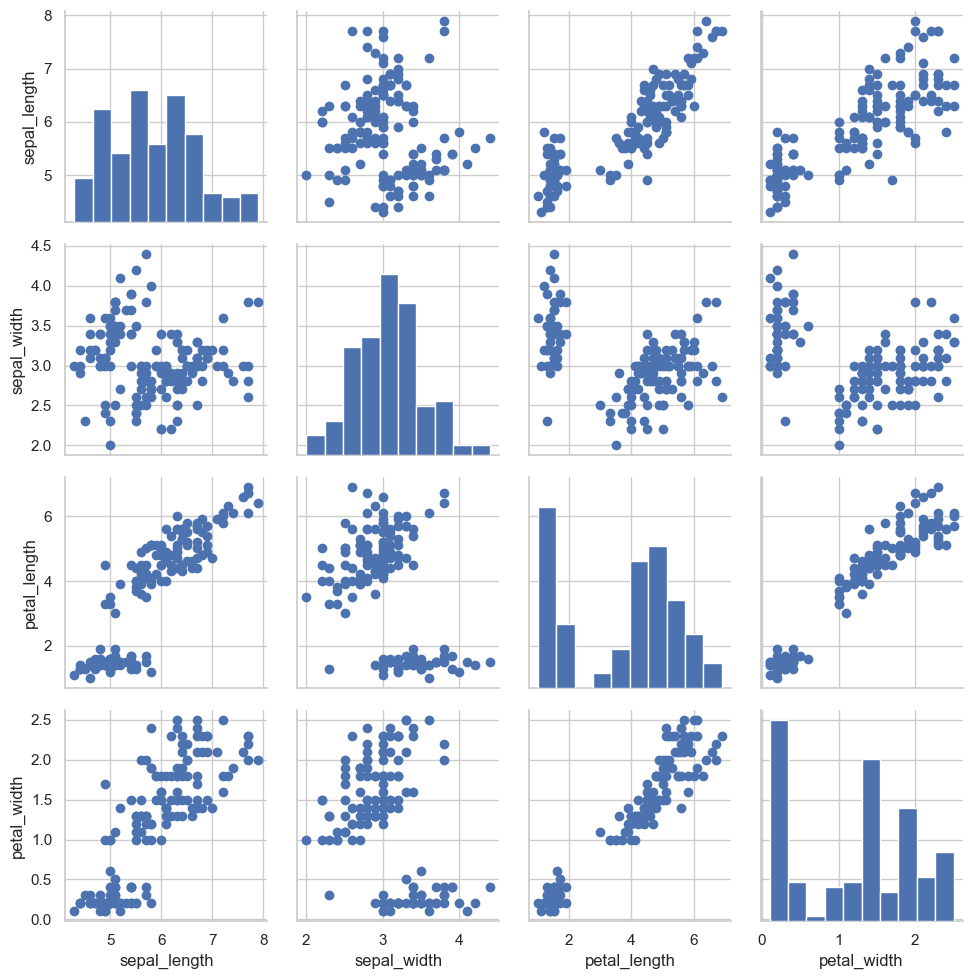

In [164]:
#  對角線以外的可以換成別的
iris=sns.load_dataset("iris")
g=sns.PairGrid(iris)
g=g.map_diag(plt.hist)
g=g.map_offdiag(plt.scatter)

# [練習]試著讀取自己的資料，繪製出多維數據圖表